In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('E:/DATASETS/titanic_clean1.csv')

In [3]:
cols=list(df.columns)
cols

['Unnamed: 0',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Title',
 'Gen_male',
 'Survived']

In [6]:
df.shape

(1309, 10)

In [7]:
df.head()

,Unnamed: 0,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Gen_male,Survived
0,0,3,22.0,1,0,7.2500,0,0,1,0
1,1,1,38.0,1,0,71.2833,1,1,0,1
2,2,3,26.0,0,0,7.9250,0,2,0,1
3,3,1,35.0,1,0,53.1000,0,1,0,1
4,4,3,35.0,0,0,8.0500,0,0,1,0


In [4]:
df.tail()

,Unnamed: 0,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Gen_male,Survived
1304,413,3,32.252151,0,0,8.0500,0,0,1,1
1305,414,1,39.000000,0,0,108.9000,1,1,0,0
1306,415,3,38.500000,0,0,7.2500,0,0,1,1
1307,416,3,32.252151,0,0,8.0500,0,0,1,1
1308,417,3,5.482642,1,1,22.3583,1,1,1,0


In [5]:
feature_cols=cols[1:9]
feature_cols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'Gen_male']

In [6]:
X = df[feature_cols] #Feature
y = df.Survived         #TragetVariable
X_train,X_test,y_train,y_test, = train_test_split(X,y,test_size = 0.3, random_state = 1)

In [7]:
X_train.shape

(916, 8)

In [8]:
len(y_train)

916

In [9]:
X_test.shape

(393, 8)

In [10]:
#Create Decision Tree Classifier Object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [11]:
#Train Classifier
clf=clf.fit(X_train,y_train)

In [12]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [13]:
#predict the response for test dataset
y_pred = clf.predict(X_test)

[Text(283.2923076923077, 570.7800000000001, 'X[6] <= 0.5\nentropy = 0.974\nsamples = 916\nvalue = [544, 372]'),
 Text(103.01538461538462, 407.70000000000005, 'X[1] <= 16.5\nentropy = 0.817\nsamples = 532\nvalue = [397, 135]'),
 Text(51.50769230769231, 244.62, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(154.52307692307693, 244.62, 'X[4] <= 8.688\nentropy = 0.828\nsamples = 517\nvalue = [382, 135]'),
 Text(103.01538461538462, 81.53999999999996, 'entropy = 0.724\nsamples = 244\nvalue = [195, 49]'),
 Text(206.03076923076924, 81.53999999999996, 'entropy = 0.899\nsamples = 273\nvalue = [187, 86]'),
 Text(463.5692307692308, 407.70000000000005, 'X[0] <= 2.5\nentropy = 0.96\nsamples = 384\nvalue = [147, 237]'),
 Text(360.55384615384617, 244.62, 'X[1] <= 19.5\nentropy = 0.801\nsamples = 201\nvalue = [49, 152]'),
 Text(309.04615384615386, 81.53999999999996, 'entropy = 0.391\nsamples = 39\nvalue = [3, 36]'),
 Text(412.0615384615385, 81.53999999999996, 'entropy = 0.861\nsamples = 162\nva

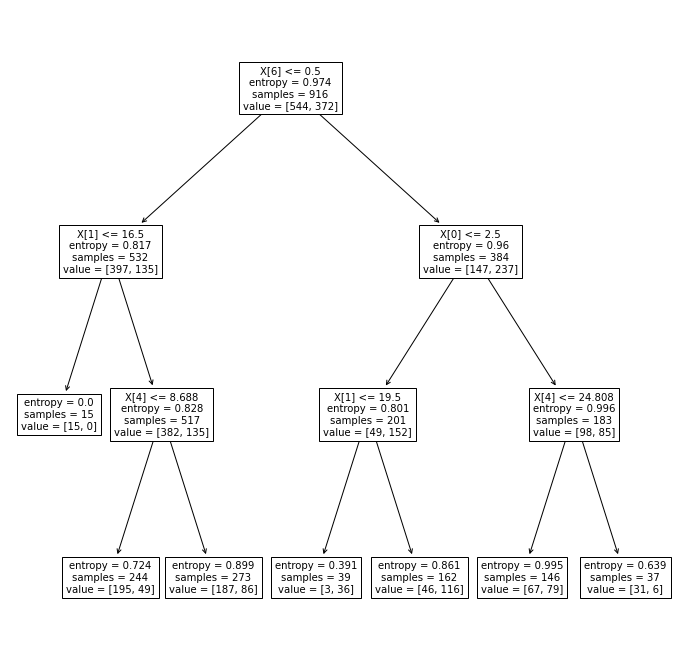

In [14]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(12,12))
tree.plot_tree(clf)

In [15]:
#calculate accuracy
from sklearn import metrics

In [16]:
result=metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(result)

Confusion Matrix
[[169  46]
 [ 68 110]]


In [17]:
def plt1():
    import seaborn as sns;sns.set()
    c_mtrx=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['predicted'])
    sns.heatmap(c_mtrx,annot=True)

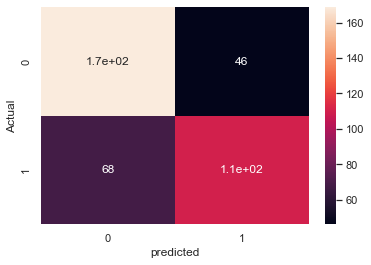

In [18]:
plt1()

In [19]:
TP = result[1, 1]      
TN = result[0, 0]
FP = result[0, 1]
FN = result[1, 0]

In [20]:
def EvClsMdl(res):
    print('Metrics computed from a confusion matrix')
    print("Accuracy:\t", metrics.accuracy_score(y_test, y_pred))
    print("Sensitivity:\t", metrics.recall_score(y_test, y_pred))
    print("Specificity:\t",TN / (TN + FP))
    print("Precision:\t", metrics.precision_score(y_test, y_pred))
    print("Classification Eerror:", 1 - metrics.accuracy_score(y_test, y_pred))
    print("False_Positive_Rate:", 1 - TN / (TN + FP))

In [21]:
EvClsMdl(result)

Metrics computed from a confusion matrix
Accuracy:	 0.7099236641221374
Sensitivity:	 0.6179775280898876
Specificity:	 0.786046511627907
Precision:	 0.7051282051282052
Classification Eerror: 0.29007633587786263
False_Positive_Rate: 0.21395348837209305
